 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv('Resources/whale_returns.csv')
whale_df.head()

Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213  
3                     0.002355                0.006726  
4                    -0.008481               -0.013098

In [3]:
# fix date
whale_df['Date'] = pd.to_datetime(whale_df['Date'])
whale_df = whale_df.set_index('Date')
whale_df = whale_df.sort_index()

In [4]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv('Resources/algo_returns.csv')
algo_df.head()

Date    Algo 1  Algo 2
0  2014-05-28  0.001745     NaN
1  2014-05-29  0.003978     NaN
2  2014-05-30  0.004464     NaN
3  2014-06-02  0.005692     NaN
4  2014-06-03  0.005292     NaN

In [7]:
# fix date
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
algo_df = algo_df.set_index('Date')
algo_df = algo_df.sort_index()

In [8]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp_returns_df = pd.read_csv('Resources/sp500_history.csv')
sp_returns_df.head()

Date     Close
0  23-Apr-19  $2933.68
1  22-Apr-19  $2907.97
2  18-Apr-19  $2905.03
3  17-Apr-19  $2900.45
4  16-Apr-19  $2907.06

In [11]:
# Check Data Types
sp_returns_df.dtypes

Date     object
Close    object
dtype: object

In [12]:
# Fix Data Types
sp_returns_df['Close'] = sp_returns_df['Close'].apply(lambda x: float(x[1:]))

date_format = "%d-%b-%y"
sp_returns_df['Date'] = sp_returns_df['Date'].apply(lambda x: dt.datetime.strptime(x, date_format))

In [13]:
# Calculate Daily Returns
sp_returns_df = sp_returns_df.set_index('Date')
sp_returns_df = sp_returns_df.sort_index()
sp_returns_df['Close'] = sp_returns_df['Close'].pct_change()

In [14]:
# Drop nulls
sp_returns_df = sp_returns_df.dropna()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df=sp_returns_df.rename(columns={'Close':'S&P 500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = whale_df.join([algo_df,sp_returns_df])
returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

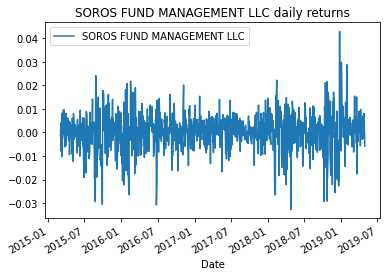

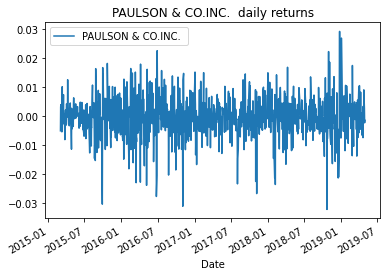

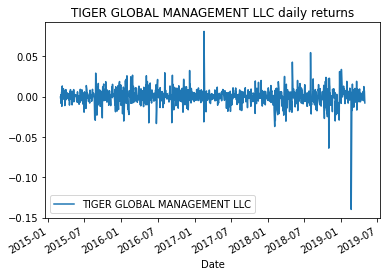

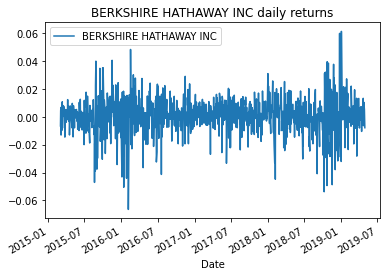

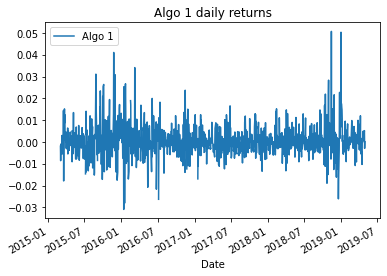

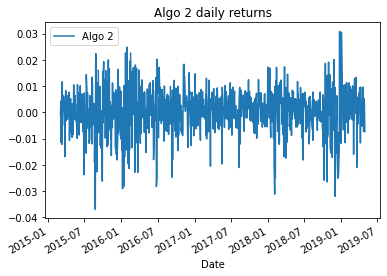

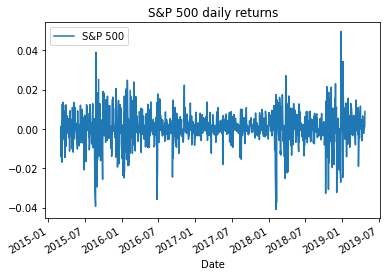

In [17]:
# Plot daily returns of all portfolios
for col in returns_df.columns:
    returns_df.plot(y=col)
    plt.title(f'{col} daily returns')
    plt.show()

#### Calculate and Plot cumulative returns.

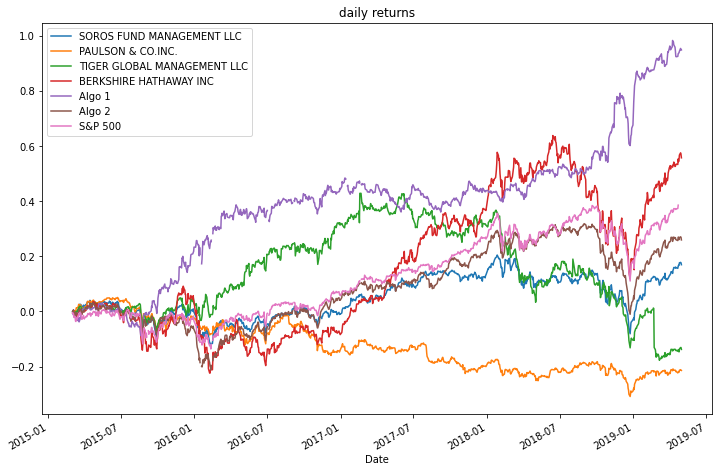

In [18]:
# Calculate cumulative returns of all portfolios
cum_returns_df = (1 + returns_df).cumprod() - 1

# Plot cumulative returns
cum_returns_df.plot(figsize=(12,8))
plt.title(f'daily returns')
plt.show()

From the Plots:

- Algo 1 and BERKSHIRE HATHAWAY INC outperform the S&P 500 while the rest underperform it.

we can confirm this by :

Calculating difference in cumulative returns between each portfolio and the S&P 500 and plot the result to determine which portfolios have outperformed or underperformed the market.

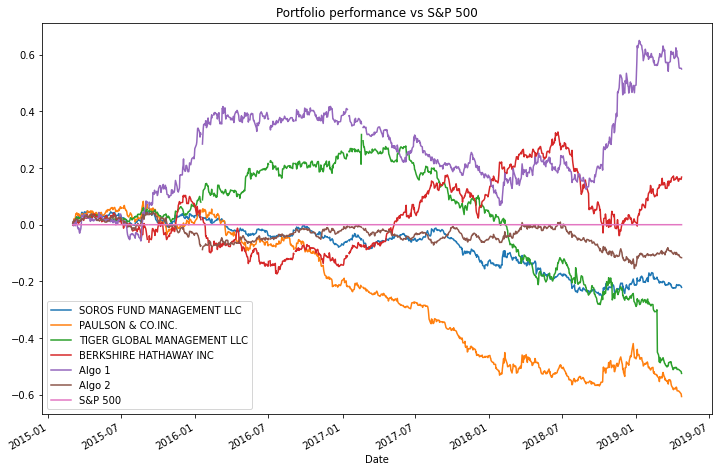

In [19]:
performance_df = cum_returns_df.sub(cum_returns_df['S&P 500'], axis=0)
performance_df.plot(figsize=(12,8))
plt.title('Portfolio performance vs S&P 500')
plt.show()

This confirms that Algo 1 and BERKSHIRE HATHAWAY INC outperform the S&P 500.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


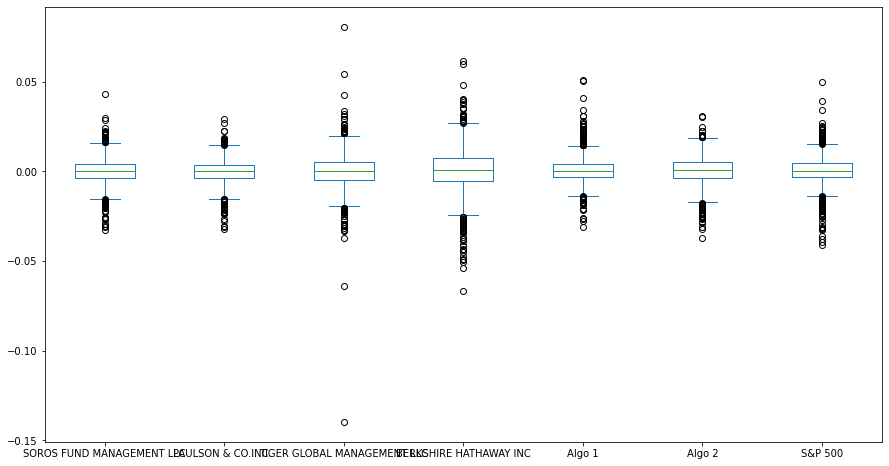

In [20]:
# Box plot to visually show risk
returns_df.plot.box(figsize=(15,8))
plt.show()

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = returns_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007601
Algo 2                         0.008327
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp_std = daily_std['S&P 500']

# Determine which portfolios are riskier than the S&P 500
comparison = daily_std > sp_std
comparison

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

> TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have a greater standerd deviation than the S&P 500. They therefore, have a higher level of risk.

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * (252 ** 0.5)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
Algo 1                         0.120660
Algo 2                         0.132186
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

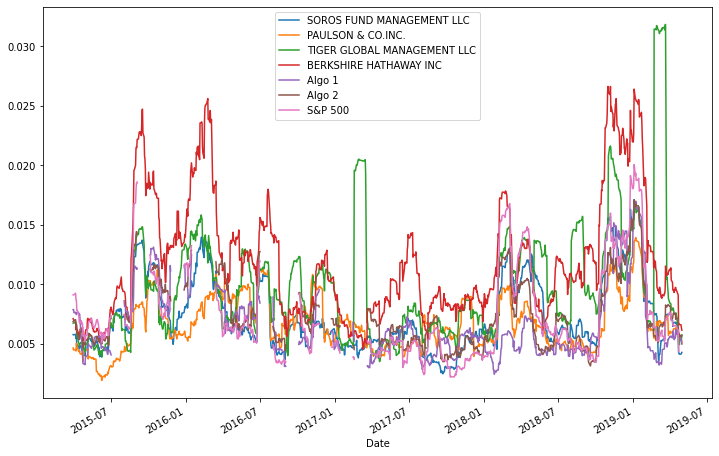

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(12,8))
plt.show()

### Calculate and plot the correlation

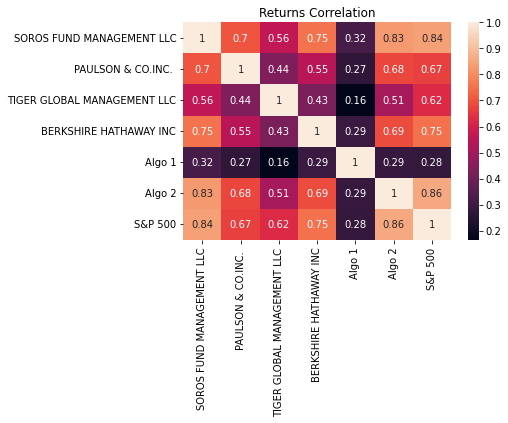

In [25]:
import seaborn as sns

# Calculate the correlation
correlation = returns_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, annot=True)
plt.title('Returns Correlation')
plt.show()

> Algo 2, SOROS FUND MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have  a high positive correlation of 0.86, 0.84 and 0.75 respectively with the S&P 500, therefore closely mimick the S&P 500.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

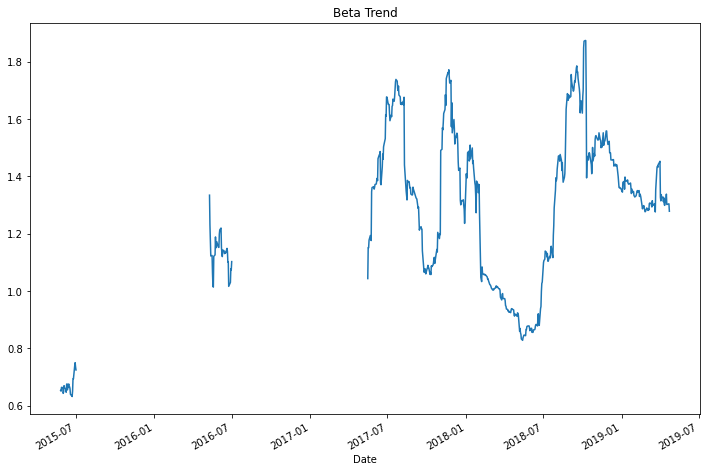

In [26]:
# Calculate covariance of a single portfolio
covariance = returns_df['BERKSHIRE HATHAWAY INC'].cov(returns_df['S&P 500'])

# Calculate variance of S&P 500
variance = returns_df['S&P 500'].var()

# Computing beta
beta = covariance / variance

# Plot beta trend
wind_size=60
beta_trend = (returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=wind_size).cov(returns_df['S&P 500']) / returns_df['S&P 500'].rolling(window=wind_size).var()).plot(figsize=(12,8))
plt.title('Beta Trend')
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

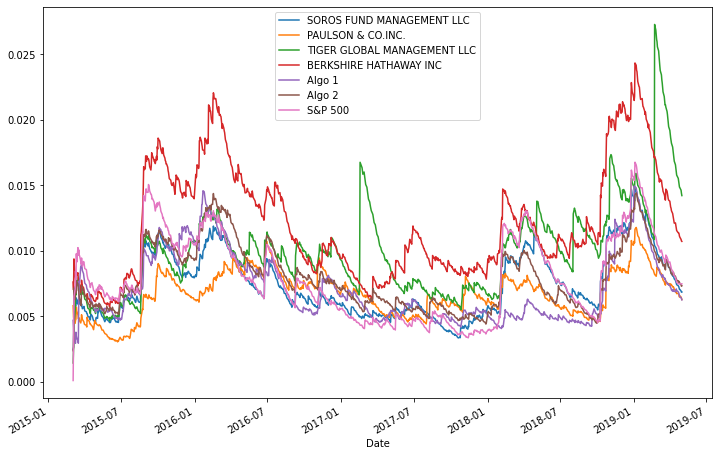

In [27]:
# Use `ewm` to calculate the rolling window
ewm_std = returns_df.ewm(halflife=21).std()

# Plot EWMA of standard deviation
ewm_std.plot(figsize=(12,8))
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Set risk-free rate
risk_free_rate = 0

# Calculate excess returns
excess_returns = returns_df.sub(risk_free_rate)

# Calculate Sharpe ratios
sharpe_ratios = excess_returns.mean() / excess_returns.std()

# Annualized Sharpe Ratios
annualized_sharpe_ratios = sharpe_ratios * (252 ** 0.5)
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
Algo 1                         1.388424
Algo 2                         0.485438
S&P 500                        0.648267
dtype: float64

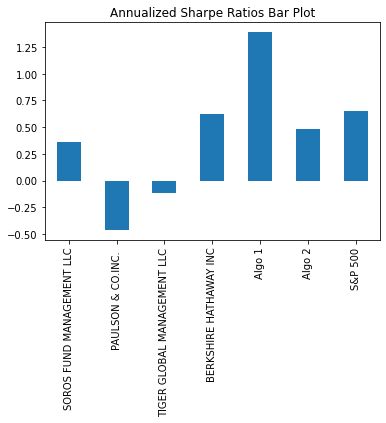

In [29]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot.bar()
plt.title('Annualized Sharpe Ratios Bar Plot')
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed both the S&P 500 and the whales portfolios. However, Algo 2 outperformed SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC and TIGER GLOBAL MANAGEMENT LLC but failed to outperform BERKSHIRE HATHAWAY INC and the S&P 500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
aapl_df = pd.read_csv("Resources/aapl_historical.csv")

# data preprocessing
aapl_df = aapl_df.drop('Symbol', axis=1)
aapl_df = aapl_df.rename(columns={"NOCP":'AAPL'})
aapl_df['Trade DATE'] = pd.to_datetime(aapl_df['Trade DATE'])
aapl_df = aapl_df.set_index('Trade DATE')
aapl_df = aapl_df.sort_index()

aapl_df.head()

AAPL
Trade DATE        
2018-05-11  188.59
2018-05-14  188.15
2018-05-15  186.44
2018-05-16  188.18
2018-05-17  186.99

In [31]:
# Reading data from 2nd stock
cost_df = pd.read_csv("Resources/cost_historical.csv")

# data preprocessing
cost_df = cost_df.drop('Symbol', axis=1)
cost_df = cost_df.rename(columns={"NOCP":'COST'})
cost_df['Trade DATE'] = pd.to_datetime(cost_df['Trade DATE'])
cost_df = cost_df.set_index('Trade DATE')
cost_df = cost_df.sort_index()

cost_df.head()

COST
Trade DATE        
2018-05-11  195.76
2018-05-14  195.88
2018-05-15  195.48
2018-05-16  198.71
2018-05-17  199.60

In [32]:
# Reading data from 3rd stock
goog_df = pd.read_csv("Resources/goog_historical.csv")

# data preprocessing
goog_df = goog_df.drop('Symbol', axis=1)
goog_df = goog_df.rename(columns={"NOCP":'GOOG'})
goog_df['Trade DATE'] = pd.to_datetime(goog_df['Trade DATE'])
goog_df = goog_df.set_index('Trade DATE')
goog_df = goog_df.sort_index()

goog_df.head()

GOOG
Trade DATE         
2018-05-11  1098.26
2018-05-14  1100.20
2018-05-15  1079.23
2018-05-16  1081.77
2018-05-17  1078.59

In [33]:
# Combine all stocks in a single DataFrame
stocks_df = aapl_df.join([cost_df, goog_df])

In [34]:
# Reset Date index
stocks_df = stocks_df.reset_index()
stocks_df = stocks_df.set_index('Trade DATE')

In [35]:
# Reorganize portfolio data by having a column per symbol
## Already Done..

In [36]:
# Calculate daily returns
stocks_dr = stocks_df.pct_change()

# Drop NAs
stocks_dr = stocks_dr.dropna()
# Display sample data

stocks_dr.head()

AAPL      COST      GOOG
Trade DATE                              
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stocks_dr.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
stocks_dr = stocks_dr.join(portfolio_returns.rename('Portfolio'))

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
stocks_dr = stocks_dr.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
daily_std = stocks_dr.std()
annualized_std = daily_std * (252 ** 0.5)
annualized_std

AAPL         0.296955
COST         0.209320
GOOG         0.263554
Portfolio    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

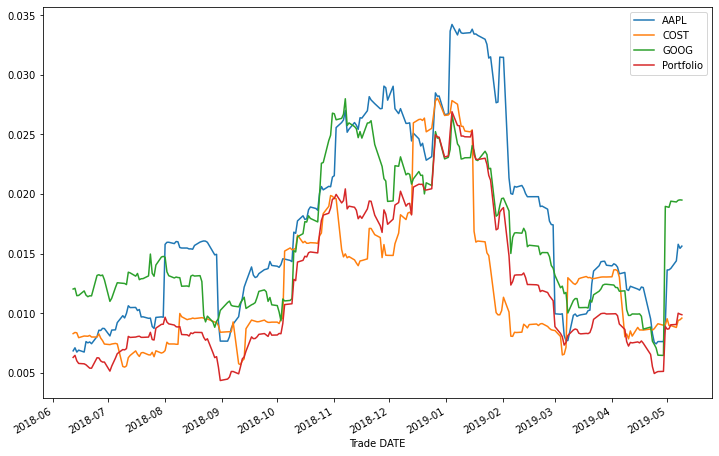

In [41]:
# Calculate rolling standard deviation
rolling_std = stocks_dr.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(12,8))
plt.show()

### Calculate and plot the correlation

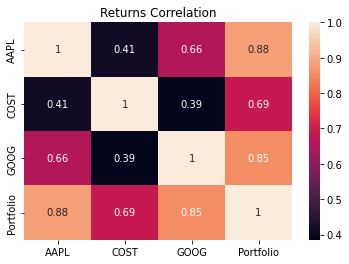

In [42]:
# Calculate and plot the correlation

correlation = stocks_dr.corr()

sns.heatmap(correlation, annot=True)
plt.title('Returns Correlation')
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

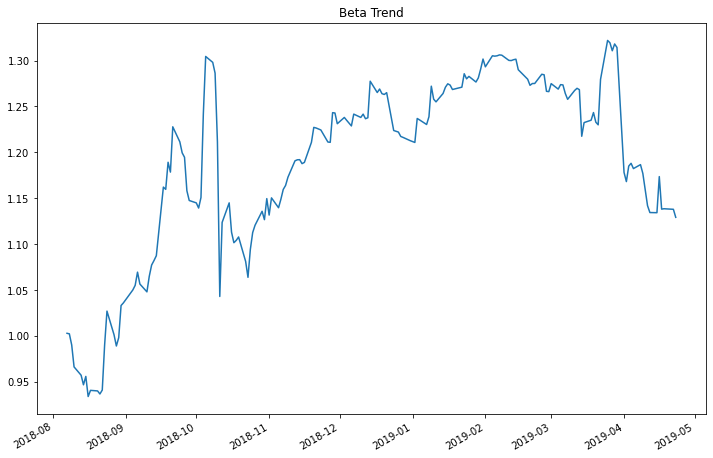

In [43]:
# Calculate and plot Beta

# calculate the covariance of the portfolio
covariance = stocks_dr['Portfolio'].cov(returns_df['S&P 500'])

# Calculate variance of S&P 500
variance = returns_df['S&P 500'].var()

# Computing beta
beta = covariance / variance

# Plot beta trend
wind_size=60
beta_trend = (stocks_dr['Portfolio'].rolling(window=wind_size).cov(returns_df['S&P 500']) / returns_df['S&P 500'].rolling(window=wind_size).var()).plot(figsize=(12,8))
plt.title('Beta Trend')
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
# set risk rate
risk_free_rate = 0

# Calculate excess returns
excess_returns = stocks_dr.sub(risk_free_rate)

# Calculate Sharpe ratios
sharpe_ratios = excess_returns.mean() / excess_returns.std()

# Annualized Sharpe Ratios
annualized_sharpe_ratios = sharpe_ratios * (252 ** 0.5)
annualized_sharpe_ratios

AAPL         0.361306
COST         1.160482
GOOG         0.349657
Portfolio    0.701280
dtype: float64

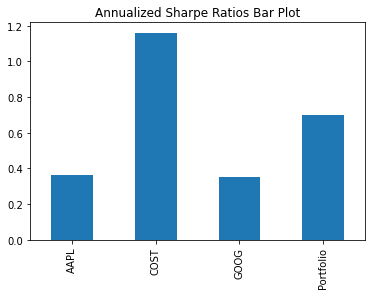

In [45]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot.bar()
plt.title('Annualized Sharpe Ratios Bar Plot')
plt.show()

### How does your portfolio do?

It appears that the portfolio has a higher risk-adjusted return than both AAPL and GOOG, but a lower risk-adjusted return than COST. The portfolio’s annualized Sharpe ratio is 0.701280, which is higher than AAPL’s Sharpe ratio of 0.361306 and GOOG’s Sharpe ratio of 0.349657, but lower than COST’s Sharpe ratio of 1.160482.This means that, on a risk-adjusted basis, the portfolio has outperformed both AAPL and GOOG but underperformed COST over the given time period.